In [1]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [2]:
from konlpy.tag import Mecab

mecab = Mecab()

In [3]:
path_to_file = os.getenv('HOME') + '/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()   # 한 줄씩 출력
    
print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [4]:
raw[0:100]

['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"',
 '모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.',
 '그러나 이것은 또한 책상도 필요로 하지 않는다.',
 '79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.',
 '정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.',
 '이 지역에 있는 미국 선박과 상업용 선박들에 대한 알카에다의 (테러) 시도 중 여러 건이 실패했다는 것을 알게 된 후에, 전문가들은 테러 조직이 여전히 세계 경제에 타격을 입히려 한다고 경고하고 있으며, 동남 아시아에 있는 세계 경제의 주요 통로가 위험에 처해 있다고 그들은 생각하고 있다.',
 '국립 과학 학회가 발표한 새 보고서에따르면, 복잡한 임무를 수행해야 하는 군인들이나 보다 오랜 시간 동안 경계를 늦추지 않고 있기 위해 도움이 필요한 군인들에게 카페인이 반응 시간을 증가시키고 임무 수행 능력을 향상시키는데 도움이 된다고 한다.',
 '이 보고서에따르면, "특히, 군사 작전에서 생사가 걸린 상황이 될 수도 있는 반응 속도와 시각 및 청각의 경계 상태를 유지시키기 위해 카페인이 사용될 수도 있다." 고 한다.',
 '"결정적인 순간에 그들의 능력을 증가시켜 줄 그 무엇이 매우 중요합니다."',
 '연구가들이 이미 커피 대체품으로서 음식 대용 과자나 껌에 카페인을 첨가하는 방법을 연구하고 있다고 Archibald는 말했다.',
 '약 200600밀리그램의, 비슷한 분량의 카페인은 또한 육체적 지구력을 강화시키는 데 효과적인 것 같으며, 특히 고도가 높은 곳에서 약해진 육체적 지구력을 일부 회복시켜주는 데 유용하다는 것이 이번 연구에서 밝혀졌

In [5]:
raw[0:100][::10]

['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"',
 '약 200600밀리그램의, 비슷한 분량의 카페인은 또한 육체적 지구력을 강화시키는 데 효과적인 것 같으며, 특히 고도가 높은 곳에서 약해진 육체적 지구력을 일부 회복시켜주는 데 유용하다는 것이 이번 연구에서 밝혀졌다.',
 '북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.',
 '어휘 :',
 '"경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."',
 '신랑 들러리가 포도주 잔을 들어 올린다 그리고는 술주정을 늘어놓는다.',
 '수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.',
 '34명을 태운 필리핀 국내 여객기가 추락한 후에 필리핀 해안 경비대와 해군 잠수부들이 마닐나 만(灣)에서 생존자를 수색하고 있다. 추락한지 이틀이 지난 지금 까지 그들은 승객 16명을 구조했으며, 이미 사망한 다른 14명을 발견했다고 해군 관리들이 말했다.',
 '또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.',
 '라고 미국 심장 협회 대변인인 제럴드 플레처 박사가 말했다.']

In [6]:
raw

['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"',
 '모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.',
 '그러나 이것은 또한 책상도 필요로 하지 않는다.',
 '79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.',
 '정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.',
 '이 지역에 있는 미국 선박과 상업용 선박들에 대한 알카에다의 (테러) 시도 중 여러 건이 실패했다는 것을 알게 된 후에, 전문가들은 테러 조직이 여전히 세계 경제에 타격을 입히려 한다고 경고하고 있으며, 동남 아시아에 있는 세계 경제의 주요 통로가 위험에 처해 있다고 그들은 생각하고 있다.',
 '국립 과학 학회가 발표한 새 보고서에따르면, 복잡한 임무를 수행해야 하는 군인들이나 보다 오랜 시간 동안 경계를 늦추지 않고 있기 위해 도움이 필요한 군인들에게 카페인이 반응 시간을 증가시키고 임무 수행 능력을 향상시키는데 도움이 된다고 한다.',
 '이 보고서에따르면, "특히, 군사 작전에서 생사가 걸린 상황이 될 수도 있는 반응 속도와 시각 및 청각의 경계 상태를 유지시키기 위해 카페인이 사용될 수도 있다." 고 한다.',
 '"결정적인 순간에 그들의 능력을 증가시켜 줄 그 무엇이 매우 중요합니다."',
 '연구가들이 이미 커피 대체품으로서 음식 대용 과자나 껌에 카페인을 첨가하는 방법을 연구하고 있다고 Archibald는 말했다.',
 '약 200600밀리그램의, 비슷한 분량의 카페인은 또한 육체적 지구력을 강화시키는 데 효과적인 것 같으며, 특히 고도가 높은 곳에서 약해진 육체적 지구력을 일부 회복시켜주는 데 유용하다는 것이 이번 연구에서 밝혀졌

In [7]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length
    
print("문장의 최단 길이: ", min_len)
print("문장의 최장 길이: ", max_len)
print("문장의 평균 길이: ", sum_len // len(raw))

문장의 최단 길이:  1
문장의 최장 길이:  377
문장의 평균 길이:  60


In [8]:
sentence_length = np.zeros((max_len), dtype=np.int)

/tmp/ipykernel_1485/974175350.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


In [9]:
sentence_length

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 문장 길이의 분포도 확인

In [10]:
for sen in raw:
    sentence_length[len(sen)-1] += 1
sentence_length

array([   1,   13,   25,  137,   24,  121,   50,   57,   77,  103, 1761,
        781,  148,  720,  311,  247,  954,  319, 1611,  898, 2113,  461,
        494,  556,  535,  526,  595,  651,  746,  708,  779,  741,  796,
        797,  853,  891,  986,  991,  929, 1025, 1084, 1087, 1090, 1159,
       1093, 1170, 1134, 1150, 1160, 1212, 1227, 1289, 1310, 1315, 1298,
       1222, 1332, 1348, 1255, 1320, 1288, 1322, 1324, 1333, 1255, 1185,
       1195, 1299, 1195, 1190, 1149, 1129, 1039, 1115, 1065, 1071,  943,
        991,  985,  935,  932,  911,  819,  814,  828,  742,  736,  737,
        684,  676,  692,  688,  651,  603,  569,  542,  512,  542,  475,
        449,  438,  423,  429,  391,  366,  342,  320,  274,  290,  267,
        251,  252,  259,  205,  242,  206,  217,  180,  165,  170,  165,
        170,  136,  161,  138,  116,  103,  123,  112,   69,   82,   93,
         71,   97,   60,   60,   67,   72,   53,   60,   54,   60,   55,
         51,   46,   28,   41,   36,   29,   25,   

In [11]:
len(sen)

58

In [12]:
raw[0]

'개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"'

In [13]:
len(raw[0])

36

In [14]:
sentence_length[35]

891

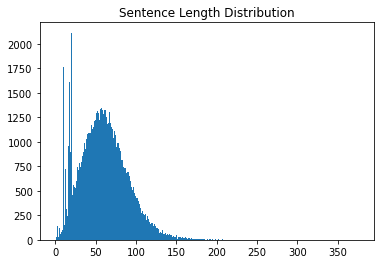

In [15]:
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [16]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            
            if count > 100: return
            
check_sentence_with_length(raw,1)

’


In [17]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx)

Outlier Index: 10
Outlier Index: 18
Outlier Index: 20


In [18]:
sentence_length[10]

1761

In [19]:
sentence_length[11]

781

In [20]:
sentence_length[19]

898

In [21]:
sentence_length[18]

1611

In [22]:
check_sentence_with_length(raw, 10)

선례가 하나 있다.
이것이 사실일까요?
당연시 될 것이다.
오차범위는 없었다.
여러분은 이 동물이
다칠 위험이 적다.
3월’’ ''안경:
1. 장난감 만들기
5. 운동 트레이너
6. 이벤트 기획자
-순간순간을 즐기기
2. 레스토랑 점원
5.어미니의 실수:
웃는 얼굴을 한다:
*홍역, 이하선염:
* 여행자의 질병:
무료 무선 인터넷:
숙박비 카드 결재:
무료 인터넷 사용:
무료 무선 인터넷:
친절하게 대화한다.
생후 24개월까지:
휘드비섬, 워싱턴주
환영한다 진행자들！
요가호텔 숙박비 :
당신 삶을 바꿔라.
“아이를 만드세요…
그는 "올슨은 매우
또한 ‘트랜스포머:
대학탐방은 이렇다.
마지막 곤돌라였다.
-반으로 줄인 무게
▶관련 동영상 보기
친숙하게 들리나요?
▶관련 동영상 보기
그의 저서 ‘행복;
* 등을 두드려라.
▶관련 동영상 보기
그의 근육질 어깨.
왜 인간은 이럴까?
그래서 다시 쐈다.
▶관련 동영상 보기
틸트로터, 헬기니?
스타벅스쿠폰 무료!
틸트로터, 헬기니?
메일 한통이 만드는
틸트로터, 헬기니?
틸트로터, 헬기니?
틸트로터, 헬기니?
이 건물은 추하다.
이 건물은 추하다.
메일 한통이 만드는
메일 한통이 만드는
틸트로터, 헬기니?
틸트로터, 헬기니?
모스크바의 밤 풍경
메일 한통이 만드는
위태로운 일자리 수
위태로운 일자리 수
메일 한통이 만드는
틸트로터, 헬기니?
틸트로터, 헬기니?
고프섬은 무인도다.
고프섬은 무인도다.
메일 한통이 만드는
개야”라고 외쳤다.
개야”라고 외쳤다.
햄의 지금 심정은?
틸트로터, 헬기니?
메일 한통이 만드는
메일 한통이 만드는
스타벅스쿠폰 무료!
틸트로터, 헬기니?
메일 한통이 만드는
메일 한통이 만드는
스타벅스쿠폰 무료!
日, 경기침체 심화
메일 한통이 만드는
틸트로터, 헬기니?
selloff 주가
왕의 귀환”입니다.
식별, 판별, 분간
mortar 박격포
비난, 고소, 고발
적대, 대립, 항쟁
epic 서사시적인
“ 폴 하비입니다.
결심, 결의, 해답
고맙습니다, 리타.
6살의 아이처럼…”
운에 맡기고 해보다

In [23]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [24]:
check_sentence_with_length(raw, 18)

베트남의 호치민시를 방문한 클린턴
"그들의 정책 처방은 간단합니다.
인공 지능은 이제 막 시작되었다:
여자들이 그 일을 할 수 있는가?
저녁식사 부분은 순조롭지 못하다:
간단히 말해서 항생제의 오용이다.
- 2년 동안 이곳에 있었습니다.
트루먼은 폭탄을 투하해야만 했다.
아이들은 떠들다가 잠자리에 든다.
본드는 또한 절에서 성교를 한다.
그러나 핵무기는 좀 다른 문제다.
그리고 관리들을 당혹스럽게 하면서
사람도 숲에 위협이 될 수 있다.
그러나 핵심적인 의혹은 남아있다:
그것은 힘든 싸움임이 입증되었다.
그는 1989년 고국에 돌아왔다.
그 과정에 문제가 없지는 않았다.
투표 매수에 대한 보도가 있었다.
빨리 걷는 것은 심장에 유익하다.
걷기 프로그램은 시작하기가 쉽다.
나는 갈수록 점점 더 화가 났다.
나는 독서를 하고 해변도 걸었다.
중단 결정은 출판계를 전율케했다.
"누가 인터넷 접속을 끊었는가?"
다행히 탑승객들의 부상은 없었다.
12.직장에 어울리지 않은 옷차림
-스트레스를 받고 있음을 인정하기
면접 예측 질문에 대해 숙지한다:
실제 악취 제거제는 냄새가 없다.
둘은 다만 침대에서 책을 읽는다.
피하자는 앱란테스 뿐만이 아니다.
가격을 낮추는 방법을 찾고 있다.
해외로밍에 2가지 어려움이 있다.
사울 프리드랜더는 ‘전멸의 세월:
전원이 내 의견에 옳다고만 한다.
좋은 상사의 피드백에 대한 입장:
전원이 내 잘못을 지적해야 한다.
나쁜 상사는 현실로부터 도피한다.
침실에 쌓인 잡동사니를 정리한다.
당시 폭탄테러로 21명이 숨졌다.
의사가 인정하는 우선 성장 요인:
석유산업은 이라크의 기간산업이다.
메인주의 대의원 수는 24명이다.
일일 스키장 이용료는 81달러다.
그는 현재 영국에서 망명 중이다.
메신저호는 2004년에 발사됐다.
프란체스카와 탈리아는 친구사이다.
가게에는 아무도 없다”고 말했다.
이 일은 시설 내부에서 해결됐다.
예루살렘 문제도 과제로 남아있다.
그는 “이는 재앙”이라고 말했다.
당신은 손님이라는 것을 명심한다.
사상자의 신원은 밝혀지

### 문장의 순서가 상관없다면 set을 이용해 중복을 제거한다

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


/tmp/ipykernel_1485/390535405.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


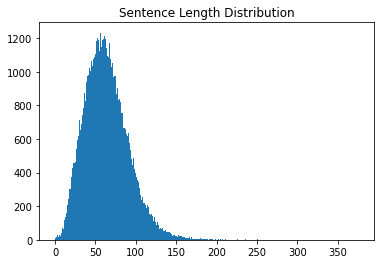

In [25]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

 - 너무 짧은 데이터는 오히려 노이즈로 작용할 수 있습니다.
 - 모든 데이터를 다 사용하는 것은 연산 측면에서 비효율적입니다. 

미니 배치 특성상 각 데이터의 크기가 모두 동일해야 하기 때문에 가장 긴 데이터를 기준으로 Padding 처리를 해야 합니다. 

/tmp/ipykernel_1485/1483434014.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


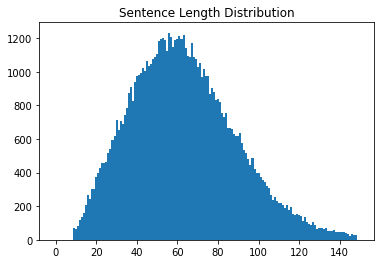

In [26]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [27]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)
    
    tensor = tokenizer.texts_to_sequences(corpus)
    
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding="post")
    
    return tensor, tokenizer

In [28]:
split_corpus=[]

for kor in filtered_corpus:
    split_corpus.append(kor.split())
split_corpus[0]    

['마이클',
 '프리만',
 'LA',
 '카운티',
 '소방서장은',
 '화재조사단이',
 '이번',
 '화재',
 '원인을',
 '밝히지',
 '못했다고',
 '전했다.']

In [29]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size: ", len(split_tokenizer.index_word))   # index_word 글자를 정수로 바꾸기

Split Vocab Size:  237435


In [30]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


# Mecab 형태소 분석기

### 설치방법

In [31]:
#! python3 -m pip install konlpy       # Python 3.x

In [32]:
# ! python3 -m pip install --upgrade pip

https://konlpy.org/ko/latest/install/

In [33]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [34]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


- tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
- tokenizer.index_word 를 사용하여 Decoding

In [35]:
text = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(text[0])

백악관 역사 위원회 ( white house historical association ) 는 보관 하 고 있 는 당시 기록 에서 노예 는 무덥 고 습한 워싱턴 의 여름 날씨 에 도 자주 일 주일 중 7 일 노동 에 동원 됐 다고 밝혔 다 .


In [36]:
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

백악관 역사 위원회 ( white house historical association ) 는 보관 하 고 있 는 당시 기록 에서 노예 는 무덥 고 습한 워싱턴 의 여름 날씨 에 도 자주 일 주일 중 7 일 노동 에 동원 됐 다고 밝혔 다 . 


# SentencePiece 사용하기

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.6.0
1.22.2
3.4.3
0.5.2


In [38]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 Mar 16 06:07 korean_spm.model
-rw-r--r-- 1 root root 146213 Mar 16 06:07 korean_spm.vocab


In [39]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [40]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [41]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1956 5665    5    4 7975 1990    3    0    0    0    0    0    0    0]
 [ 107 1641  101    4    0  417   11    4   14    0 1976    3    3    3]]
